This notebook is a follow-up of "Cropped_image_cleanup".
The aim is to re-extract RGB from cropped imaged derived from Yolov3 object detection.
1534/1555 input images triggered detection at a threshold of 0.05.
Detection utilized a Yolov3 model pre-trained on openimages data.

In [63]:
import colorgram
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import matplotlib.colors as mcolor
from ast import literal_eval
from scipy.spatial import distance as distance
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance as distance
from mpl_toolkits.mplot3d import Axes3D

dir = os.getcwd()
home = os.path.dirname(os.path.dirname(dir)) ## 2 levels up of working directory dir

In [6]:
# import cropped images data extensively processed.
pd_cropped = pd.read_csv(os.path.join(dir, r'darknet_detected_cropped.csv'), index_col = 0)
# 3021 cropped imaged generated from 1534 catalog images.
pd_cropped.tail()

,dn_crop,dn_order,box_order,class_name,class_id,image,index_image,crop_width,crop_height,crop_area,left_x,top_y,width,height,deviation-score,centerness-score
3016,img_1553_3017_432_Clothing.jpg.jpg,1553,3017,Clothing,432,Pillow_select/Page_9_7.jpg,Page_9_7,409,353,144377,56,63,409,353,0.747829,284.152248
3017,img_1553_3018_465_Furniture.jpg.jpg,1553,3018,Furniture,465,Pillow_select/Page_9_7.jpg,Page_9_7,441,373,164493,22,54,441,372,0.681668,276.098261
3018,img_1554_3019_465_Furniture.jpg.jpg,1554,3019,Furniture,465,Pillow_select/Page_9_8.jpg,Page_9_8,406,311,126266,42,110,406,311,0.701271,249.189185
3019,img_1554_3020_432_Clothing.jpg.jpg,1554,3020,Clothing,432,Pillow_select/Page_9_8.jpg,Page_9_8,394,299,117806,61,116,394,299,0.757995,260.165813
3020,img_1555_3021_465_Furniture.jpg.jpg,1555,3021,Furniture,465,Pillow_select/Page_9_9.jpg,Page_9_9,398,372,148056,43,54,398,372,0.716406,275.659210


In [57]:
# Bounding box with a lower deviation score is more likely to contain the product.
# Select one cropped image for each input catalog image using the above criterion.
pd_cropped_sort =pd_cropped.sort_values(by=['dn_order','deviation-score'])
n = pd_cropped_sort.shape[0]
judge = [0] * n
for i in range(1,n):
    if pd_cropped_sort['dn_order'][i]==pd_cropped_sort['dn_order'][i-1]:
        judge[i]=1
judge_bool = [i==0 for i in judge]

# remember to reset index after cropping
pd_cropped_select = pd_cropped_sort[judge_bool].reset_index(drop=True)

In [60]:
# move on to run colorgram on all images under the path img_dir
# initiate two empty lists
path_cropped_image = r'Yolov3_pillow/result_batch3/result_img'
img_dir = os.path.join(home, path_cropped_image)

RGB_x = []
Proportion_x = []
RGB_y = []
Proportion_y = []

for i in range(pd_cropped_select.shape[0]):
    img_name = pd_cropped_select['dn_crop'][i]
    colors = colorgram.extract(os.path.join(img_dir,img_name),2)
    RGB_x.append(colors[0].rgb)
    Proportion_x.append(colors[0].proportion)
    if colors[0].proportion==1:
        RGB_y.append(colors[0].rgb)
        Proportion_y.append(0)
    else:
        RGB_y.append(colors[1].rgb)
        Proportion_y.append(colors[1].proportion)

pd_cropped_select['RGB_x'] = RGB_x
pd_cropped_select['Proportion_x'] = Proportion_x
pd_cropped_select['RGB_y'] = RGB_y
pd_cropped_select['Proportion_y'] = Proportion_y

export_csv = pd_cropped_select.to_csv(os.path.join(dir,r'cropped_image_RGB.csv'), index = True, header=True)    

In [65]:
pd_cropped_select.head()

,dn_crop,dn_order,box_order,class_name,class_id,image,index_image,crop_width,crop_height,crop_area,left_x,top_y,width,height,deviation-score,centerness-score,RGB_x,Proportion_x,RGB_y,Proportion_y
0,img_1_1_192_Food.jpg.jpg,1,1,Food,192,Pillow_select/Page_10_11.jpg,Page_10_11,405,381,154305,39,48,404,381,0.713624,279.977231,"(174, 162, 148)",0.638163,"(246, 245, 242)",0.361837
1,img_2_4_432_Clothing.jpg.jpg,2,4,Clothing,432,Pillow_select/Page_10_12.jpg,Page_10_12,374,443,165682,33,14,374,443,0.742966,302.417344,"(213, 82, 79)",0.545133,"(254, 253, 253)",0.454867
2,img_3_5_365_Picture frame.jpg.jpg,3,5,Picture frame,365,Pillow_select/Page_10_13.jpg,Page_10_13,414,443,183402,34,19,414,443,0.735033,314.781273,"(215, 215, 219)",0.617392,"(251, 251, 251)",0.382608
3,img_4_6_465_Furniture.jpg.jpg,4,6,Furniture,465,Pillow_select/Page_10_14.jpg,Page_10_14,477,273,130221,-5,122,482,274,0.650712,236.476214,"(18, 18, 18)",0.588922,"(249, 249, 249)",0.411078
4,img_5_9_446_Book.jpg.jpg,5,9,Book,446,Pillow_select/Page_10_15.jpg,Page_10_15,462,459,212058,5,28,468,459,0.674481,312.607182,"(233, 232, 230)",0.971598,"(229, 227, 228)",0.028402


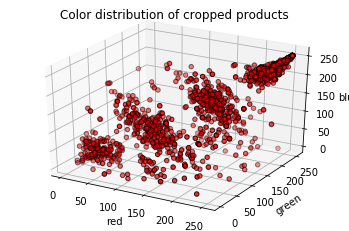

<Figure size 432x288 with 0 Axes>

In [69]:
# next, draw a 3D plot to see the distribution of products after cropping and cleaning
crop_r =[i[0] for i in pd_cropped_select['RGB_x']]
crop_g =[i[1] for i in pd_cropped_select['RGB_x']]
crop_b =[i[2] for i in pd_cropped_select['RGB_x']]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(crop_r,crop_g,crop_b, color='r', edgecolor='k')

ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue') 

ax.set_title('Color distribution of cropped products')

plt.show()
plt.clf()

In [70]:
# import pallet file
palette_tuple = pd.read_csv(os.path.join(dir,r'palette_clean.csv'), index_col = 0)

# reformat tuples after read_csv
# do the same for palette_tuple
palette_tuple['RGB1']=palette_tuple['RGB1'].apply(literal_eval)
palette_tuple['RGB2']=palette_tuple['RGB2'].apply(literal_eval)
palette_tuple['RGB3']=palette_tuple['RGB3'].apply(literal_eval)
palette_tuple['RGB4']=palette_tuple['RGB4'].apply(literal_eval)

In [74]:
# Method 1: Euclidean distance with weights [0.3,0.59,0.11]
# First, find the most similar color to user's choice from all colors in palette database
# if multiple palette colors are pulled return the one with smallest index number
# since palettes are ranked by popularity

location = []

for i in range(pd_cropped_select.shape[0]):
    
    u = list(pd_cropped_select['RGB_x'][i])

    def vv(v):
        return distance.euclidean(u, v, [0.3**2, 0.59**2, 0.11**2])

    # return a numpy 2d arrary and then the minimum value
    np_dist = np.array(palette_tuple.applymap(vv))
    minim = np.amin(np_dist)

    # return location of this minimum value and append to previous output
    location.append([np.where(np_dist == minim)[0][0],np.where(np_dist == minim)[1][0]])

# store location in product table
# also want to add palette name and position of the product on the palette to product table
palette_name = palette_tuple.index.values[[x[0] for x in location]]
position = [x[1] for x in location]
pd_cropped_select['palette_name'] = palette_name
pd_cropped_select['position_on_pltt'] = position

export_csv = pd_cropped_select.to_csv (os.path.join(dir,r'cropped_image_RGB_plt.csv'), index = True, header=True)

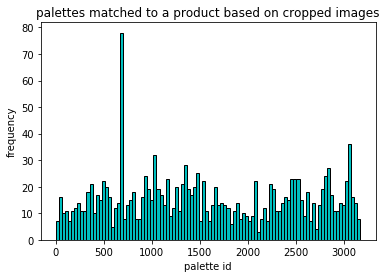

<Figure size 432x288 with 0 Axes>

In [75]:
# see distribution of palettes that match with a product
palette_matched = np.array([i[0] for i in location])

plt.hist(palette_matched, bins= 100, color='c', edgecolor='k')

plt.xlabel('palette id')
plt.ylabel('frequency')
plt.title('palettes matched to a product based on cropped images')

plt.show()
plt.clf()

In [82]:
# once a product is selected, it traces to a palette
# then find 3 more products that match with the remaining 3 colors in the palette
def getMore_rev(locRGB_love, palette_tpl, img_RGB):
    # (a) locRGB_loved is the location of the matched color on the palette data, e.g. 3 as in [1756, 3]
    # (b) palette_tpl is the 4 RGB tuples associated with locRGB_loved
    #       example: [(2, 146, 183) (26, 200, 219) (140, 117, 106) (222, 226, 236)]
    # (c) img_RGB is img_url['RGB_x']
    # when multiple products are matched for the same color, choose the one on top of the img_url list
    # since products are ranked by "Best selling"
    palette = np.delete(np.array(palette_tpl),locRGB_love)  # this is the partial palette with 3 colors left
    loc3more = []
    for i in range(3):
        rgb = palette[i]
        u = [rgb[0],rgb[1],rgb[2]]
        def vv(v):
            return distance.euclidean(u, v, [0.3**2, 0.59**2, 0.11**2])
        # go through all products
        np_dist = np.array(img_RGB.apply(vv))
        minim = np.amin (np_dist)        
        loc3more.append(np.where(np_dist == minim)[0][0])
    return loc3more

In [ ]:
# initiate an empty dataframe
results = pd.DataFrame()

for i in range(pd_cropped_select.shape[0]):
    results = results.append(
        pd.DataFrame(
            getMore_rev(locRGB_love = pd_cropped_select['position_on_pltt'][i], 
                    palette_tpl = palette_tuple.loc[pd_cropped_select['palette_name'][i]], 
                    img_RGB = pd_cropped_select['RGB_x'])
        ).T
    )

In [100]:
# need to reset index since it's 0 for all now
results.reset_index(drop=True)
results.rename(columns={0: 'match1', 
                       1: 'match2',
                       2: 'match3'}, inplace = True)
export_csv = results.to_csv (os.path.join(dir,r'match_result_afterYolov3.csv'), index = True, header=True)

In [104]:
#output = pd_cropped_select.join(results) # always check index before joining
output["RGB_x_hex"] = ['#%02x%02x%02x' % i for i in output["RGB_x"]]

In [105]:
output.head()

,dn_crop,dn_order,box_order,class_name,class_id,image,index_image,crop_width,crop_height,crop_area,...,RGB_x,Proportion_x,RGB_y,Proportion_y,palette_name,position_on_pltt,match1,match2,match3,RGB_x_hex
0,img_1_1_192_Food.jpg.jpg,1,1,Food,192,Pillow_select/Page_10_11.jpg,Page_10_11,405,381,154305,...,"(174, 162, 148)",0.638163,"(246, 245, 242)",0.361837,Newborn Bundle,2,449,338,1300,#aea294
1,img_2_4_432_Clothing.jpg.jpg,2,4,Clothing,432,Pillow_select/Page_10_12.jpg,Page_10_12,374,443,165682,...,"(213, 82, 79)",0.545133,"(254, 253, 253)",0.454867,Natural Flush,2,844,1243,607,#d5524f
2,img_3_5_365_Picture frame.jpg.jpg,3,5,Picture frame,365,Pillow_select/Page_10_13.jpg,Page_10_13,414,443,183402,...,"(215, 215, 219)",0.617392,"(251, 251, 251)",0.382608,Seaweed Sushi,3,1170,432,213,#d7d7db
3,img_4_6_465_Furniture.jpg.jpg,4,6,Furniture,465,Pillow_select/Page_10_14.jpg,Page_10_14,477,273,130221,...,"(18, 18, 18)",0.588922,"(249, 249, 249)",0.411078,Secret Romance,1,824,1198,1284,#121212
4,img_5_9_446_Book.jpg.jpg,5,9,Book,446,Pillow_select/Page_10_15.jpg,Page_10_15,462,459,212058,...,"(233, 232, 230)",0.971598,"(229, 227, 228)",0.028402,Living Details,1,444,258,1412,#e9e8e6


In [106]:
export_csv = output.to_csv (os.path.join(dir,r'cropped_image_w_recommendation.csv'), index = True, header=True)

In [108]:
# Lastly, add hex format to palette file for html
palette_tuple['hex1'] = ['#%02x%02x%02x' % i for i in palette_tuple["RGB1"]]
palette_tuple['hex2'] = ['#%02x%02x%02x' % i for i in palette_tuple["RGB2"]]
palette_tuple['hex3'] = ['#%02x%02x%02x' % i for i in palette_tuple["RGB3"]]
palette_tuple['hex4'] = ['#%02x%02x%02x' % i for i in palette_tuple["RGB4"]]
export_csv = palette_tuple.to_csv (os.path.join(dir,r'palette_clean_hex.csv'), index = True, header=True)